# Decahedral nanoparticle (using hierarchical clustering)

In [53]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from stm.feature.peaks import find_local_peaks
from stm.segment import segment_neighbors
from stm.register import create_template
from stm.utils.plotutils import add_colorbar, discrete_cmap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


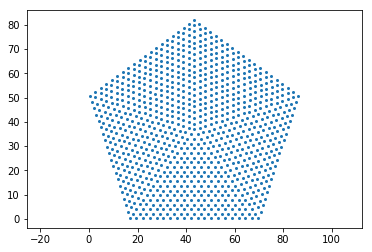

In [8]:
points = np.load('data/pt_decahedron.npy')

plt.plot(points[:,0],points[:,1],'o',markersize=2)
plt.axis('equal');

In [28]:
segments = segment_neighbors(points, n_points=7)

sample = segments.sample(.2)

sample.calc_distance_matrix(progress_bar=True)

sample.calc_clusters(0.01)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:05<00:00, 36.38it/s]


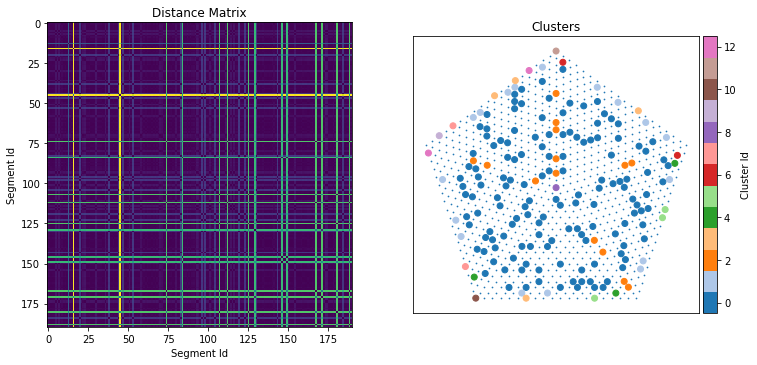

In [60]:
fig,axes=plt.subplots(1,2,figsize=(12,6))

m = axes[0].imshow(sample.distance_matrix)

axes[0].set_title('Distance Matrix')
axes[0].set_xlabel('Segment Id')
axes[0].set_ylabel('Segment Id')

add_colorbar(ax, m, loc='right', label = 'RMSD')

cmap = discrete_cmap(range(13),N=20,cmap=plt.cm.tab20)

axes[1].scatter(points[:,0], points[:,1], s=2, marker='.')
m = axes[1].scatter(sample.origins[:,0], sample.origins[:,1], c=sample.clusters, cmap=cmap, vmin=-.5, vmax=12.5)

axes[1].set_title('Clusters')
axes[1].set_aspect('equal', adjustable='box')

axes[1].set_xticks([])
axes[1].set_yticks([])

add_colorbar(axes[1], m, loc='right', label = 'Cluster Id');

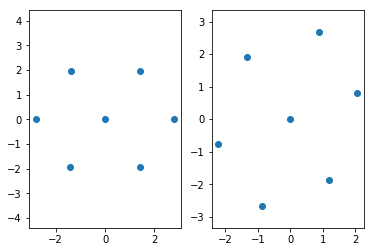

In [78]:
templates = [sample.average_segment(cluster=i) for i in [0,1]]

fig,axes=plt.subplots(1,2)

for ax,template in zip(axes,templates):
    ax.plot(template[:,0],template[:,1],'o')
    ax.axis('equal')

In [83]:
segments.match(templates[0], calc_strain=True, scale_invariant=False, rmsd_max=.1)

segments.calibrate_strain(.2)

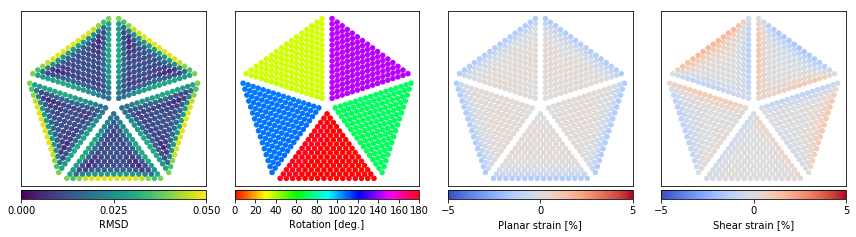

In [85]:
size=20
planar = (segments.strain[:,0,0] + segments.strain[:,1,1])/2

fig,axes = plt.subplots(1,4, figsize=(12,4))
m = axes[0].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.rmsd, vmin=0, vmax=.05, s=size)
add_colorbar(axes[0], m, loc='bottom', ticks=np.linspace(0,.05,3), label='RMSD')

m = axes[1].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.rotation/np.pi*180 % 180, 
                cmap='hsv', vmin=0, vmax=180, s=size)
add_colorbar(axes[1], m, loc='bottom', label = 'Rotation [deg.]')

m = axes[2].scatter(segments.origins[:,0], segments.origins[:,1], c=planar * 100, 
                cmap='coolwarm', vmin=-5, vmax=5, s=size)
add_colorbar(axes[2], m, loc='bottom', ticks=np.linspace(-10,10,5), label = 'Planar strain [%]')

axes[3].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.strain[:,0,1] * 100, 
                cmap='coolwarm', vmin=-5, vmax=5, s=size)
add_colorbar(axes[3], m, loc='bottom', ticks=np.linspace(-10,10,5), label = 'Shear strain [%]')

for ax in axes.ravel():
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()